#1. 파이토치로 다층 퍼셉트론 구현하기

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)     #pytorch에서는 gpu에 해당 tensor를 올리라고 코드를 작성해주어야 한다.
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [4]:
model = nn.Sequential(
    nn.Linear(2,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1,bias=True),
    nn.Sigmoid(),
).to(device)

위의 모델을 그림으로 표현하면 다음과 같다

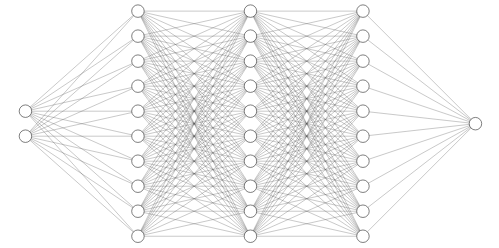

In [5]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [6]:
for epoch in range(10001):
    optimizer.zero_grad()

    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983073234558
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931379437446594
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930762529373169
3100 0.6930692195892334
3200 0.6930612325668335
3300 0.6930519938468933
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 

#2. 학습된 다층 퍼셉트론의 예측값 확인하기

In [7]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0
